# ch14_2 DBSCAN

이번 챕터에서는 k-means clustering의 한계를 극복하기 위해 제안된 클러스터링 알고리즘인 DBSCAN에 대해서 알아보겠습니다.

DBSCAN은 Density Based Spatial Clustering of Applications with Noise의 약자로, 데이터가 위치하고 있는 공간 밀집도를 기준으로 클러스터를 구분합니다. 자기를 중심으로 반지름 R의 공간에 최소 M개의 포인트가 존재하는 점을 코어 포인트라고 부릅니다. 코어 포인트는 아니지만, 반지름 R 안에 다른 코어포인트가 있는 점을 보더 포인트라고 부릅니다. 코어 포인트도, 보더 포인트도 아닌 점들을 노이즈라고 부릅니다.

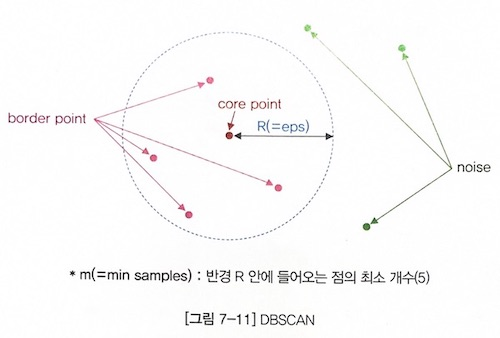

DBSCAN은 아래와 같은 과정으로 학습됩니다.

1. 모든 점의 ε 거리 안에 있는 이웃 점을 구하고, minPts 이상의 이웃을 가진 core point를 식별합니다.
2. core point들을 연결해서 connected component를 찾습니다. 그 외의 점들은 무시합니다.
3. core point가 아닌 점들을 인접한 클러스터에 할당합니다. 만약 가장 가까운 클러스터까지의 거리가 최소값보다 크다면 noise로 처리합니다.

### DBSCAN 장점

1. 미리 클러스터의 개수를 지정하지 않아도 됩니다.
2. 구형이 아닌,  임의의 클러스터 형태도 발견할 수 있습니다.
3. noise 처리를 포함하고 있어서 아웃라이어에 강합니다.

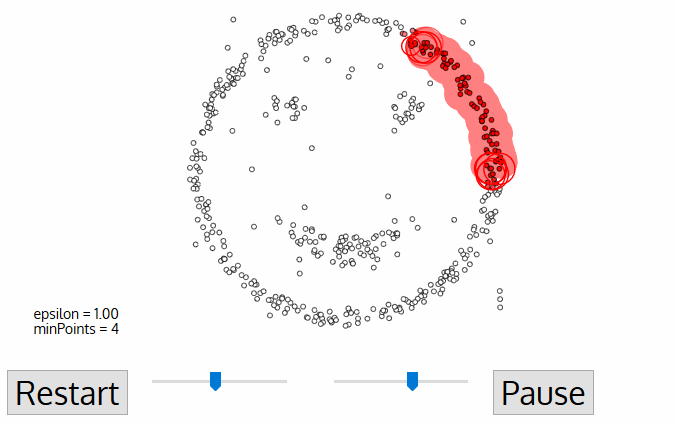

### DBSCAN 단점
1. 학습시킬 때마다 동일한 결과를 내주지 않을 수 있습니다. core point와 noise는 고정적이지만, 데이터를 처리하는 순서에 따라서 border point가 다른 클러스터에 속할 수 있습니다.
2. 거리를 측정하는 함수가 매우 중요합니다. 보통은 유클리드 거리를 사용하지만, 차원이 높아질 수록 차원의 저주에 빠지기 쉽습니다. 
3. 밀도 차이가 큰 데이터 집합을 잘 클러스터링할 수 없는 이유는 모든 클러스터에 대해 minPts-ε 조합을 적절하게 선택할 수 없기 때문입니다.
4. 데이터와 스케일을 잘 이해하지 못하면 의미있는 거리 임계값 ε을 선택하기가 어렵습니다.

## 파라미터 결정하기
DBSCAN 알고리즘을 학습시키기 위해서는 ε과 MinPts 두 가지 파라미터를 결정해야합니다.
- MinPts: 주어진 반지름 안에 최소 몇개의 인접 데이터 포인트가 있어야 core point로 결정할 것인가
- ε: 반지름 크기

### ε 결정하기

k-distance graph를 이용해서 결정할 수 있습니다. 이는 K개의 가까운 이웃 거리를 측정한 다음, elbow가 등장하는 지점을 찾아서 ε 값으로 설정할 수 있습니다.

### minPts 결정하기

$$D+1 <= minPts <= 2 * D$$

일반적으로 minPts는 자료의 차원 D + 1과 2*D 사이 값으로 정합니다. 단, 최소 3 이상의 값으로 정해야합니다. 작은 min_pts 값은 클러스터가 더 작고 노이즈 포인트가 더 많아지는 경향이 있습니다. 반대로 큰 min_pts 값은 노이즈 포인트를 줄이고 더 큰 클러스터를 형성합니다.

## 실습: 고객 군집화 하기
K-means clustering을 실습했던 데이터로 DBSCAN 모델을 학습시켜보겠습니다.

In [ ]:
import pandas as pd

df = pd.read_csv("./data/mall_customers.csv")

In [ ]:
df

,Gender,Age,Income,Spending
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### 연령 - 소비지수 클러스터링

DBSCAN 알고리즘을 학습시키기 전에 먼저 최적의 ε과 minPts를 찾아야 합니다. 

- minPts: D + 1인 3으로 지정
- ε 값을 찾기 위해서 k-distance plot을 그린 뒤, elbow 지점으로 지정
- k-distance plot을 그리기 위해 필요한 K 값은 minPts - 1인 2로 지정

5 근방에서 급격하게 데이터 포인트 수가 증가하는 것을 확인할 수 있습니다. 그러므로 ε 값을 5로 지정하겠습니다. 

- minPts: 3 
- ε: 3 or 4 or 5

### 소득 - 소비 지수 클러스터링

- minPts: 3
- k: 2
- e: elbow method로 지정

### 연령-소득-소비 지수 클러스터링

이번에는 DBSCAN 알고리즘으로 3차원 클러스터링을 해보고, 시각화도 해보겠습니다. 데이터의 차원이 하나 늘었으므로 minPts를 차원 + 1인 4로 설정하고, k는 3으로 설정하여 k-distance plot을 그려서  ε값을 찾아보겠습니다.  

- minPts: D + 1인 4으로 지정
- ε 값을 찾기 위해서 k-distance plot을 그린 뒤, elbow 지점으로 지정
- k-distance plot을 그리기 위해 필요한 K 값은 minPts - 1인 3로 지정

## 정리
이번 챕터에서는 K-means clustering의 한계를 보완하는 클러스터링 기법인 DBSCAN에 대해서 알아보았습니다. 특히 DBSCAN은 noise에 강건한 특징이 있어서, 특정 군집을 타겟으로한 마케팅 전략 수립 등의 테스트에 적용해볼 수 있습니다.

하지만 클러스터링 기법은 데이터의 차원이 3차원보다 커지면 이를 그대로 시각화 하기가 어렵습니다. (차원 축소 등의 기법을 사용하면 가능하긴 합니다.) 이같은 장단점을 잘 기억하시고, 적절하게 활용하시면 좋겠습니다.